In [22]:
## SAMPLE TIME SERIES USING RETAIL DATA
## BASED ON MILLER (2015) and BROWNLEE (2016)

import pandas as pd  # DataFrame structure and operations
from pandas import Series
from datetime import datetime

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
from pandas import DataFrame
from scipy.stats import boxcox



In [2]:
# series1 = pd.read_csv('Dept1.csv', header=0)
# print('candies:\n')
# print(series1.describe())


# series25 = pd.read_csv('Dept25.csv', header=0)
# print('dept25:\n')
# print(series25.describe())


# series80 = pd.read_csv('Dept80.csv', header=0)
# print('dept80:\n')
# print(series80.describe())

In [26]:
# Define a datetime parser that will convert date column to datetime
def parser(x):
	return datetime.strptime(x, '%m/%d/%Y')

# Load Time Series data. 
# series1 = pd.read_csv('Dept1.csv', parse_dates=[0], date_parser=parser)
series1 = pd.read_csv('Dept1.csv', header=0)

print(series1.shape)
print(series1.head())
print(series1.describe())

(143, 3)
        Date     Sales  IsHoliday
0   2/5/2010  24924.50      False
1  2/12/2010  46039.49       True
2  2/19/2010  41595.55      False
3  2/26/2010  19403.54      False
4   3/5/2010  21827.90      False
              Sales
count    143.000000
mean   22513.322937
std     9854.349032
min    14537.370000
25%    16494.630000
50%    18535.480000
75%    23214.215000
max    57592.120000


In [27]:

# Load Time Series data. 
# series25 = pd.read_csv('Dept25.csv', parse_dates=[0], date_parser=parser)
series25 = pd.read_csv('Dept25.csv', header=0)
print(series25.shape)
print(series25.head())
print(series25.describe())

(143, 3)
        Date     Sales  IsHoliday
0   2/5/2010  11609.50      False
1  2/12/2010  13268.75       True
2  2/19/2010  10271.25      False
3  2/26/2010  10218.67      False
4   3/5/2010  10345.50      False
              Sales
count    143.000000
mean   10152.336783
std     1975.402197
min     5272.760000
25%     8882.515000
50%    10225.670000
75%    11188.750000
max    17880.040000


In [28]:

# Load Time Series data. 
# series80 = pd.read_csv('Dept80.csv', parse_dates=[0], date_parser=parser)
series80 = pd.read_csv('Dept80.csv', header=0)

print(series80.shape)
print(series80.head())
print(series80.describe())

(143, 3)
        Date     Sales  IsHoliday
0   2/5/2010  15694.17      False
1  2/12/2010  16720.84       True
2  2/19/2010  15918.98      False
3  2/26/2010  15673.94      False
4   3/5/2010  15680.71      False
              Sales
count    143.000000
mean   17139.314615
std     2414.333401
min     7320.660000
25%    15667.280000
50%    16973.960000
75%    18993.120000
max    22615.850000


In [29]:
series1 = series1.iloc[:,0:2]
# series1 = series1.set_index('Date')
series1.head()

,Date,Sales
0,2/5/2010,24924.50
1,2/12/2010,46039.49
2,2/19/2010,41595.55
3,2/26/2010,19403.54
4,3/5/2010,21827.90


In [30]:
series25 = series25.iloc[:,0:2]
# series25=series25.set_index('Date')
series25.head()

,Date,Sales
0,2/5/2010,11609.50
1,2/12/2010,13268.75
2,2/19/2010,10271.25
3,2/26/2010,10218.67
4,3/5/2010,10345.50


In [31]:
series80 = series80.iloc[:,0:2]
# series80 = series80.set_index('Date')
series80.head()

,Date,Sales
0,2/5/2010,15694.17
1,2/12/2010,16720.84
2,2/19/2010,15918.98
3,2/26/2010,15673.94
4,3/5/2010,15680.71


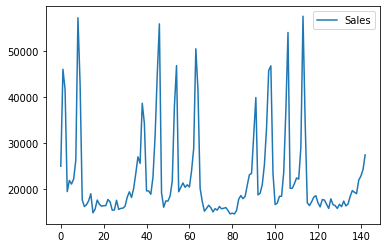

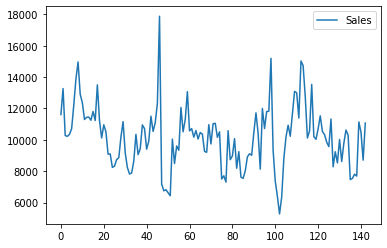

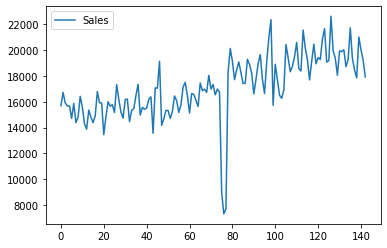

In [33]:
from matplotlib import pyplot
series1.plot()
pyplot.show()

series25.plot()
pyplot.show()

series80.plot()
pyplot.show()

In [34]:
series1

,Date,Sales
0,2/5/2010,24924.50
1,2/12/2010,46039.49
2,2/19/2010,41595.55
3,2/26/2010,19403.54
4,3/5/2010,21827.90
...,...,...
138,9/28/2012,18947.81
139,10/5/2012,21904.47
140,10/12/2012,22764.01
141,10/19/2012,24185.27


(143, 3)
        Date     Sales  IsHoliday
0   2/5/2010  56655.39      False
1  2/12/2010  62329.48       True
2  2/19/2010  72212.32      False
3  2/26/2010  55501.07      False
4   3/5/2010  59201.37      False
              Sales
count    143.000000
mean   63180.568182
std     6605.065020
min    45989.260000
25%    59180.660000
50%    62767.870000
75%    66589.975000
max    86052.030000


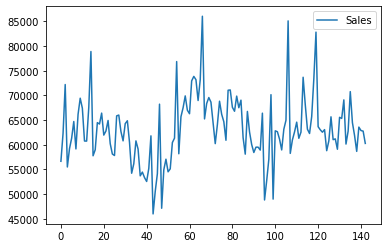

In [37]:

# Load Time Series data. 
# series94 = pd.read_csv('Dept94.csv', parse_dates=[0], date_parser=parser)
series94 = pd.read_csv('Dept94.csv', header=0)
print(series94.shape)
print(series94.head())

print(series94.describe())

series94.plot()
pyplot.show()

          Holiday
count  143.000000
mean     0.069930
std      0.255926
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000


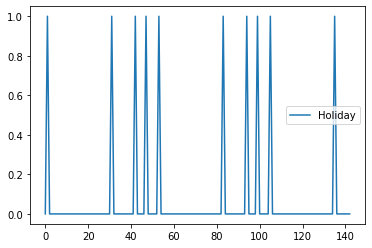

In [38]:

seriesH = pd.read_csv('TimeSeriesHoliday.csv', header=0)
print(seriesH.describe())

seriesH.plot()
pyplot.show()

In [39]:
from pandas import DataFrame
from pandas import Grouper

groups = series1['2010':'2012'].groupby(Grouper('A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
	pyplot.subplot((n_groups*100) + 10 + i)
	i += 1
	pyplot.plot(group)
pyplot.show()
print(years)
print(groups)

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2010] of <class 'str'>

In [40]:
series1.describe

<bound method NDFrame.describe of            Date     Sales
0      2/5/2010  24924.50
1     2/12/2010  46039.49
2     2/19/2010  41595.55
3     2/26/2010  19403.54
4      3/5/2010  21827.90
..          ...       ...
138   9/28/2012  18947.81
139   10/5/2012  21904.47
140  10/12/2012  22764.01
141  10/19/2012  24185.27
142  10/26/2012  27390.81

[143 rows x 2 columns]>

In [41]:
series1.groupby('Date')

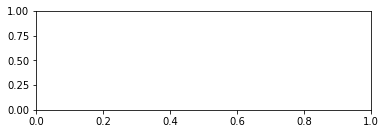

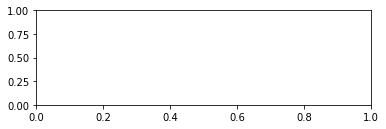

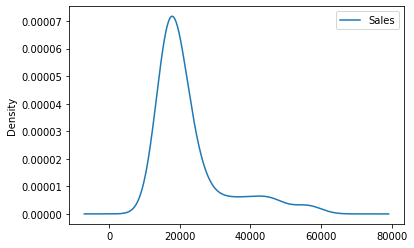

In [42]:
pyplot.figure(1)
pyplot.subplot(211)
series1.hist()
pyplot.subplot(212)
series1.plot(kind='kde')
pyplot.show()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

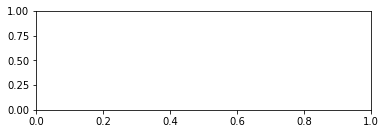

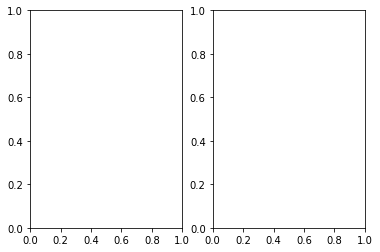

In [43]:
pyplot.figure(1)
pyplot.subplot(211)
series80.hist()
pyplot.subplot(212)
series80.plot(kind='kde')
pyplot.show()

In [ ]:
# GROUP BY YEARS
#groups = series['2010':'2012'].groupby(TimeGrouper('A'))
#years = DataFrame()
#for name, group in groups:
#    years[name.year] = group.values
#years.boxplot()
#years.show()
#print(years)

In [44]:
from statsmodels.tsa.stattools import adfuller
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

series1 = pd.read_csv('Dept1.csv', header=0)

X = series1.values
X = X.astype('float32')
# difference data
weeks_in_year = 52
stationary = difference(X, weeks_in_year)
stationary.index = series1.index[weeks_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('data/stationary.csv')
# plot
stationary.plot()
pyplot.show()

ValueError: could not convert string to float: '2/5/2010'

In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [ ]:
# USING STATIONARY TIME SERIES LOOK FOR ACF & PACF

series = pd.read_csv('stationary.csv')

series.plot()
pyplot.show()

#plot_acf(series, ax=pyplot.gca())
#pyplot.show()

#plot_pacf(series, ax=pyplot.gca())
#pyplot.show()

## DEPICTS SOME SEASONALITY IN PACF STILL
## START POINT FOR ARIMA COULD BE 2,1,1

In [ ]:
# CREATE TRAIN-TEST DATA
# DATA IS WEEKLY FOR 2+ years
# KEEP ONE QUARTER - 13 weeks - AS THE TEST DATA
series = pd.read_csv('Dept1.csv', header=0)
split_point = len(series) - 13
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff



In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [1]:
# load data
series = pd.read_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	weeks_in_year = 52
	diff = difference(history, weeks_in_year)
	# predict
	model = ARIMA(diff, order=(2,1,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, weeks_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

NameError: name 'pd' is not defined

In [ ]:
# CODE RUNS LONG FOR EVALUATION - approximately 
import warnings
import numpy
 
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		weeks_in_year = 52
		diff = difference(history, weeks_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		yhat = inverse_difference(history, yhat, weeks_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = pd.read_csv('Dept1.csv', header=0)
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
series = pd.read_csv('Dept1.csv', header=0)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	weeks_in_year = 52
	diff = difference(history, weeks_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, weeks_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# plot
residuals.hist(ax=pyplot.gca())
pyplot.show()

residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [ ]:
## RECREATE ANALYSIS WITH MEAN RESIDUAL ADDED TO EACH PREDICTION
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
series = pd.read_csv('Dept1.csv', header=0)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = -120.713087
for i in range(len(test)):
	# difference data
	weeks_in_year = 52
	diff = difference(history, weeks_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, weeks_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# plot
residuals.hist(ax=pyplot.gca())
pyplot.show()

residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [ ]:
# LOOK AT ACF AND PACF FOR RESIDUALS
plot_acf(residuals, ax=pyplot.gca())
pyplot.show()

plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

In [ ]:
## CODE FROM BROWNLEE FOR SAVING MODEL

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# load data
series = pd.read_csv('Dept1.csv', header=0)
# prepare data
X = series.values
X = X.astype('float32')
# difference data
weeks_in_year = 52
diff = difference(X, weeks_in_year)
# fit model
model = ARIMA(diff, order=(2,0,0))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual - CHANGED TO ZERO
bias = 0
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])


In [ ]:
# CODE FOR MAKING PREDICTION USING SAVED MODEL - LOOKING ONE STEP AHEAD

def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

series = pd.read_csv('Dept1.csv', header=0)
weeks_in_year = 52
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, weeks_in_year)
print('Predicted: %.3f' % yhat)

In [ ]:
# CODE FOR MAKING PREDICTION USING SAVED MODEL - LOOKING MANY STEPS AHEAD


def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load and prepare datasets
dataset = pd.read_csv('Dept1.csv', header=0)
X = dataset.values.astype('float32')
history = [x for x in X]
weeks_in_year = 52
validation = pd.read_csv('validation.csv', header=0)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, weeks_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# difference data
	weeks_in_year = 52
	diff = difference(history, weeks_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, weeks_in_year)
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
plot_acf(series80, ax=pyplot.gca())
pyplot.show()

#pyplot.subplot(212)

plot_pacf(series80, ax=pyplot.gca())
pyplot.show()